# Files

In [1]:
import csv
import json
import os
import pickle
import shutil

import numpy as np

from PIL import Image
from PIL import ImageFilter

In [2]:
DATA_FOLDER = 'data'

## Text

### Open, Read, Write

In [13]:
file = open('file.txt', 'w')

In [14]:
file.write('Hello world!')

12

In [15]:
! cat file.txt

In [16]:
file.close()

In [17]:
! cat file.txt

Hello world!

In [7]:
file = open('file.txt', 'r')

In [8]:
file.read()

'Hello world!'

In [9]:
file.close()

### Context Manager (No Need to Close)

In [10]:
# echo "Hello world!" > file.txt

with open('file.txt', 'w') as file:
    file.write('Hello world!')

In [11]:
with open('file.txt', 'r') as file:
    data = file.read()

In [18]:
# echo "Hello world!" >> file.txt

with open('file.txt', 'a') as file:
    file.write('Hello world!')

### Line by Line

In [18]:
file_path = os.path.join(DATA_FOLDER, 'one_percent.txt')

In [19]:
os.path.isfile(file_path)

True

In [22]:
with open(file_path, 'r', encoding='utf8') as f:
    line = f.readline()
    print(line)
    
    line = f.readline()
    print(line)

Из тумана раздался голос, показавшийся ему знакомым. Он был глухой, словно звучал из телефонной трубки.

— Один из сотни в конце-то концов…



In [23]:
num_lines = 2

with open(file_path, 'r', encoding='utf8') as f:
    num_read_lines = 0
    
    for line in f:
        print(line)
        
        num_read_lines = num_read_lines + 1
        
        if num_read_lines == num_lines:
            break

Из тумана раздался голос, показавшийся ему знакомым. Он был глухой, словно звучал из телефонной трубки.

— Один из сотни в конце-то концов…



In [24]:
strings = ['Hello\n', 'world!\n']

with open('file.txt', 'w') as f:
    f.writelines(strings)

In [25]:
! cat file.txt

Hello
world!


### Command Zoo

In [26]:
! ls -a

.   data      Files.ipynb  hello.bin	       lec05_image.png
..  file.csv  file.txt	   .ipynb_checkpoints


In [28]:
os.listdir('.')

['Files.ipynb',
 'file.txt',
 '.ipynb_checkpoints',
 'data',
 'hello.bin',
 'file.csv']

In [29]:
! pwd

/home/alvant/Desktop/Advanced_Python_Files_Lab


In [30]:
os.getcwd()

'/home/alvant/Desktop/Advanced_Python_Files_Lab'

In [31]:
! touch test.txt
! rm test.txt

In [32]:
open('test.txt', 'a').close()  # https://stackoverflow.com/questions/12654772/create-empty-file-using-python

os.remove('test.txt')

In [33]:
! mkdir test_dir
! rm -r test_dir

In [34]:
os.makedirs('test_dir', exist_ok=True)
shutil.rmtree('test_dir')

In [35]:
os.path.abspath(DATA_FOLDER)

'/home/alvant/Desktop/Advanced_Python_Files_Lab/data'

In [43]:
os.path.join(DATA_FOLDER, 'ezh.jpeg')

'data/ezh.jpeg'

### JSON

In [36]:
open(f'{DATA_FOLDER}/movies.json', encoding='utf8').read()

'{\n    "movies": [\n        {\n            "name": "Полночь в Париже",\n            "release_year": 2011,\n            "director": "Вуди Аллен"\n        },\n        {\n            "name": "Гравити Фолз",\n            "release_year": 2012,\n            "creator": "Алекс Хирш"\n        },\n        {\n            "name": "Окно во двор",\n            "release_year": 1954,\n            "director": "Альфред Хичкок"\n        }\n    ]\n}'

In [37]:
data = json.loads(
    open(f'{DATA_FOLDER}/movies.json', encoding='utf8').read(),
)

In [38]:
data

{'movies': [{'name': 'Полночь в Париже',
   'release_year': 2011,
   'director': 'Вуди Аллен'},
  {'name': 'Гравити Фолз', 'release_year': 2012, 'creator': 'Алекс Хирш'},
  {'name': 'Окно во двор',
   'release_year': 1954,
   'director': 'Альфред Хичкок'}]}

In [40]:
json.dumps(data, ensure_ascii=False)

'{"movies": [{"name": "Полночь в Париже", "release_year": 2011, "director": "Вуди Аллен"}, {"name": "Гравити Фолз", "release_year": 2012, "creator": "Алекс Хирш"}, {"name": "Окно во двор", "release_year": 1954, "director": "Альфред Хичкок"}]}'

In [43]:
with open('file.txt', 'w') as f:
    f.write(
        json.dumps(data, ensure_ascii=False, indent=4)
    )

In [44]:
! cat file.txt

{
    "movies": [
        {
            "name": "Полночь в Париже",
            "release_year": 2011,
            "director": "Вуди Аллен"
        },
        {
            "name": "Гравити Фолз",
            "release_year": 2012,
            "creator": "Алекс Хирш"
        },
        {
            "name": "Окно во двор",
            "release_year": 1954,
            "director": "Альфред Хичкок"
        }
    ]
}

### CSV

In [45]:
file_path = os.path.join(DATA_FOLDER, 'promoters.csv')
max_num_read_rows = 3

with open(file_path, 'r') as f:
    reader = csv.reader(f,)
    num_read_rows = 0
    
    for row in reader:
        print(row)
        
        num_read_rows = num_read_rows + 1
        
        if num_read_rows == max_num_read_rows:
            break

['+', 'S10', 'tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt']
['+', 'AMPC', 'tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaacgcatcgccaa']
['+', 'AROH', 'gtactagagaactagtgcattagcttatttttttgttatcatgctaaccacccggcg']


In [48]:
columns = ['Title', 'Release_Year']
values = ['Полночь в Париже', '2011']

with open('file.csv', 'w') as f:
    writer = csv.writer(f)
    
    writer.writerow(columns)
    writer.writerow(values)

In [49]:
! cat file.csv

## Binary

In [50]:
def hello_world():
    print("Hello world!")

In [51]:
hello_world()

Hello world!


In [52]:
pickle.dumps(hello_world)

b'\x80\x04\x95\x1c\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x0bhello_world\x94\x93\x94.'

In [53]:
with open('hello.bin', 'wb') as f:
    f.write(pickle.dumps(hello_world))

In [54]:
with open('hello.bin', 'rb') as f:
    data = f.read()

In [55]:
data

b'\x80\x04\x95\x1c\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x0bhello_world\x94\x93\x94.'

In [56]:
func = pickle.loads(data)

In [57]:
func()

Hello world!


## Appendix: Images

In [58]:
image = Image.open(
    os.path.join(DATA_FOLDER, 'ezh.jpeg')
)

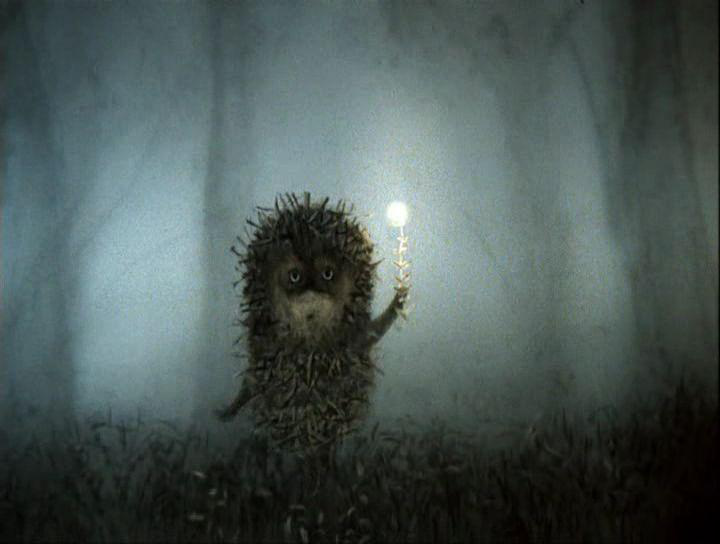

In [59]:
display(image)

In [60]:
image.mode

'RGB'

In [61]:
image.im.bands

3

In [65]:
r, g, b = image.split()

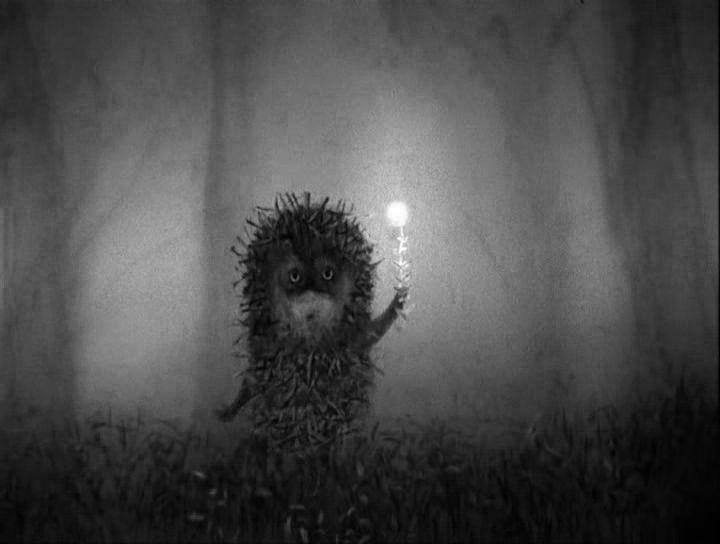

In [66]:
r

In [67]:
np.array(r)

array([[37, 37, 38, ..., 25, 13,  0],
       [36, 37, 37, ..., 25, 13,  1],
       [35, 36, 36, ..., 26, 14,  1],
       ...,
       [11, 11, 11, ...,  1,  1,  1],
       [ 8,  8,  8, ...,  1,  1,  1],
       [ 5,  5,  5, ...,  1,  1,  1]], dtype=uint8)

In [62]:
filtered = image

for i in range(20):
    filtered = filtered.filter(ImageFilter.SMOOTH)

# https://github.com/python-pillow/Pillow/blob/e4b39d9cc74f26dad1f5cad0851645cc2cd5356d/src/PIL/ImageFilter.py#L309

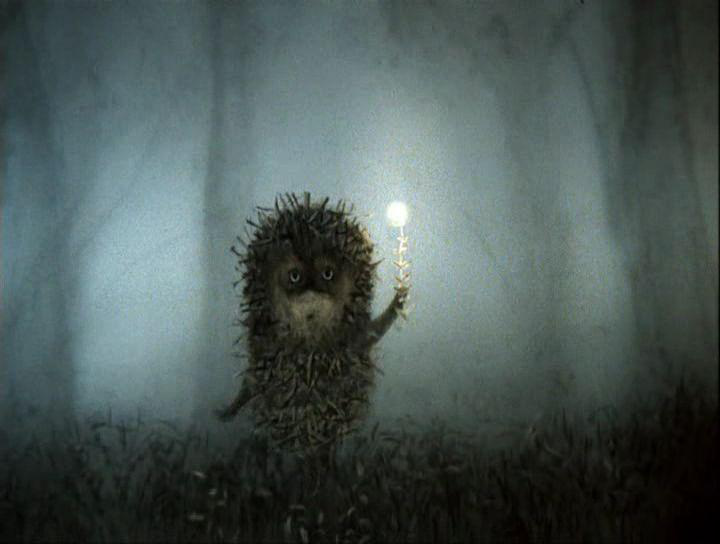

In [63]:
display(image)

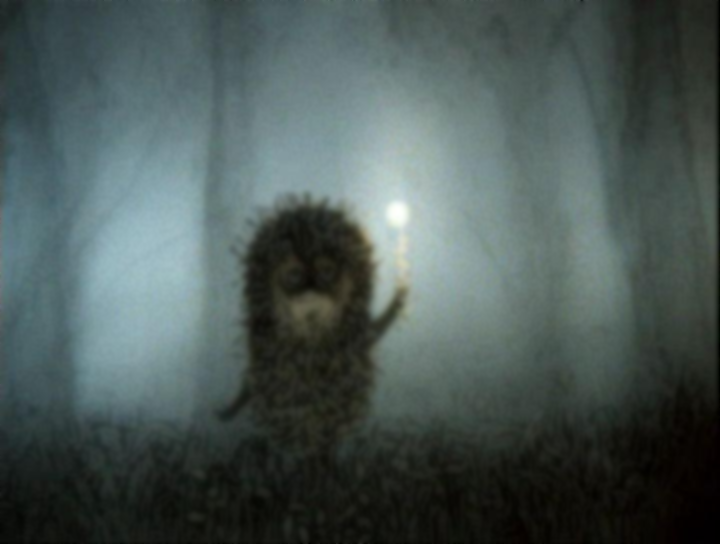

In [64]:
display(filtered)

# Errors

In [68]:
file = open('file.txt')

In [69]:
file.write('Hello')

UnsupportedOperation: not writable

In [70]:
1 / 0

ZeroDivisionError: division by zero

In [71]:
'a' + 2

TypeError: can only concatenate str (not "int") to str

In [72]:
l = [1, 2, 3]

In [73]:
l[10]

IndexError: list index out of range

In [74]:
d = {'a': 4}

In [75]:
d['b']

KeyError: 'b'

In [76]:
'1' + 3

TypeError: can only concatenate str (not "int") to str

## "Error Handling"

In [77]:
n1 = '1'
n2 = 2

try:
    print(n1 + n2)
except TypeError:
    print('Enter correct values!')

Enter correct values!
